In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('311_Service_Requests_from_2010_to_Present.csv')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (48,49) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
df.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01/01/2016 12:55:15 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01/01/2016 01:26:57 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01/01/2016 04:51:03 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01/01/2016 07:43:13 AM,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01/01/2016 03:24:42 AM,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


## Identify the shape of the dataset

In [5]:
df.shape

(364558, 53)

## Identify variables with null values

In [6]:
df.isnull().sum()

Unique Key                             0
Created Date                           0
Closed Date                         2381
Agency                                 0
Agency Name                            0
Complaint Type                         0
Descriptor                          6501
Location Type                        133
Incident Zip                        2998
Incident Address                   51699
Street Name                        51699
Cross Street 1                     57188
Cross Street 2                     57805
Intersection Street 1             313438
Intersection Street 2             314046
Address Type                        3252
City                                2997
Landmark                          364183
Facility Type                       2389
Status                                 0
Due Date                               3
Resolution Description                 0
Resolution Action Updated Date      2402
Community Board                        0
Borough         

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364558 entries, 0 to 364557
Data columns (total 53 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unique Key                      364558 non-null  int64  
 1   Created Date                    364558 non-null  object 
 2   Closed Date                     362177 non-null  object 
 3   Agency                          364558 non-null  object 
 4   Agency Name                     364558 non-null  object 
 5   Complaint Type                  364558 non-null  object 
 6   Descriptor                      358057 non-null  object 
 7   Location Type                   364425 non-null  object 
 8   Incident Zip                    361560 non-null  float64
 9   Incident Address                312859 non-null  object 
 10  Street Name                     312859 non-null  object 
 11  Cross Street 1                  307370 non-null  object 
 12  Cross Street 2  

In [8]:
df['Complaint Type'].unique()

array(['Noise - Street/Sidewalk', 'Blocked Driveway', 'Illegal Parking',
       'Derelict Vehicle', 'Noise - Commercial',
       'Noise - House of Worship', 'Posting Advertisement',
       'Noise - Vehicle', 'Animal Abuse', 'Vending', 'Traffic',
       'Drinking', 'Bike/Roller/Skate Chronic', 'Panhandling',
       'Noise - Park', 'Homeless Encampment', 'Urinating in Public',
       'Graffiti', 'Disorderly Youth', 'Illegal Fireworks',
       'Ferry Complaint', 'Agency Issues', 'Squeegee', 'Animal in a Park'],
      dtype=object)

In [7]:
df['City'].isnull().sum()

2997

In [8]:
df['City'].value_counts().index[0]

'BROOKLYN'

In [9]:
for i in range(2000):
    if(df['City'].isnull()[i]):
        print(df['City'].isnull().index[i])

33
283
302
416
611
1421
1648
1816
1965
1987


## Utilize missing value treatment

In [10]:
df['City'].fillna(df['City'].value_counts().index[0],inplace=True)
#t=df['City'].fillna(df['City'].value_counts().iloc[0])

In [11]:
df['City'].isnull().sum()

0

In [12]:
t=df['Complaint Type'].value_counts()

In [13]:
df['Complaint Type'].isnull().sum()

0

## Draw a frequency plot for city-wise complaints

In [14]:
GB=df.groupby(['City','Complaint Type']).size().unstack().fillna(0)

In [16]:
font = {'family' : 'sans-serif',
        'weight' : 'bold',
        'size'   : 22}
plt.rc('font', **font)

Text(0.5, 0, 'Count')

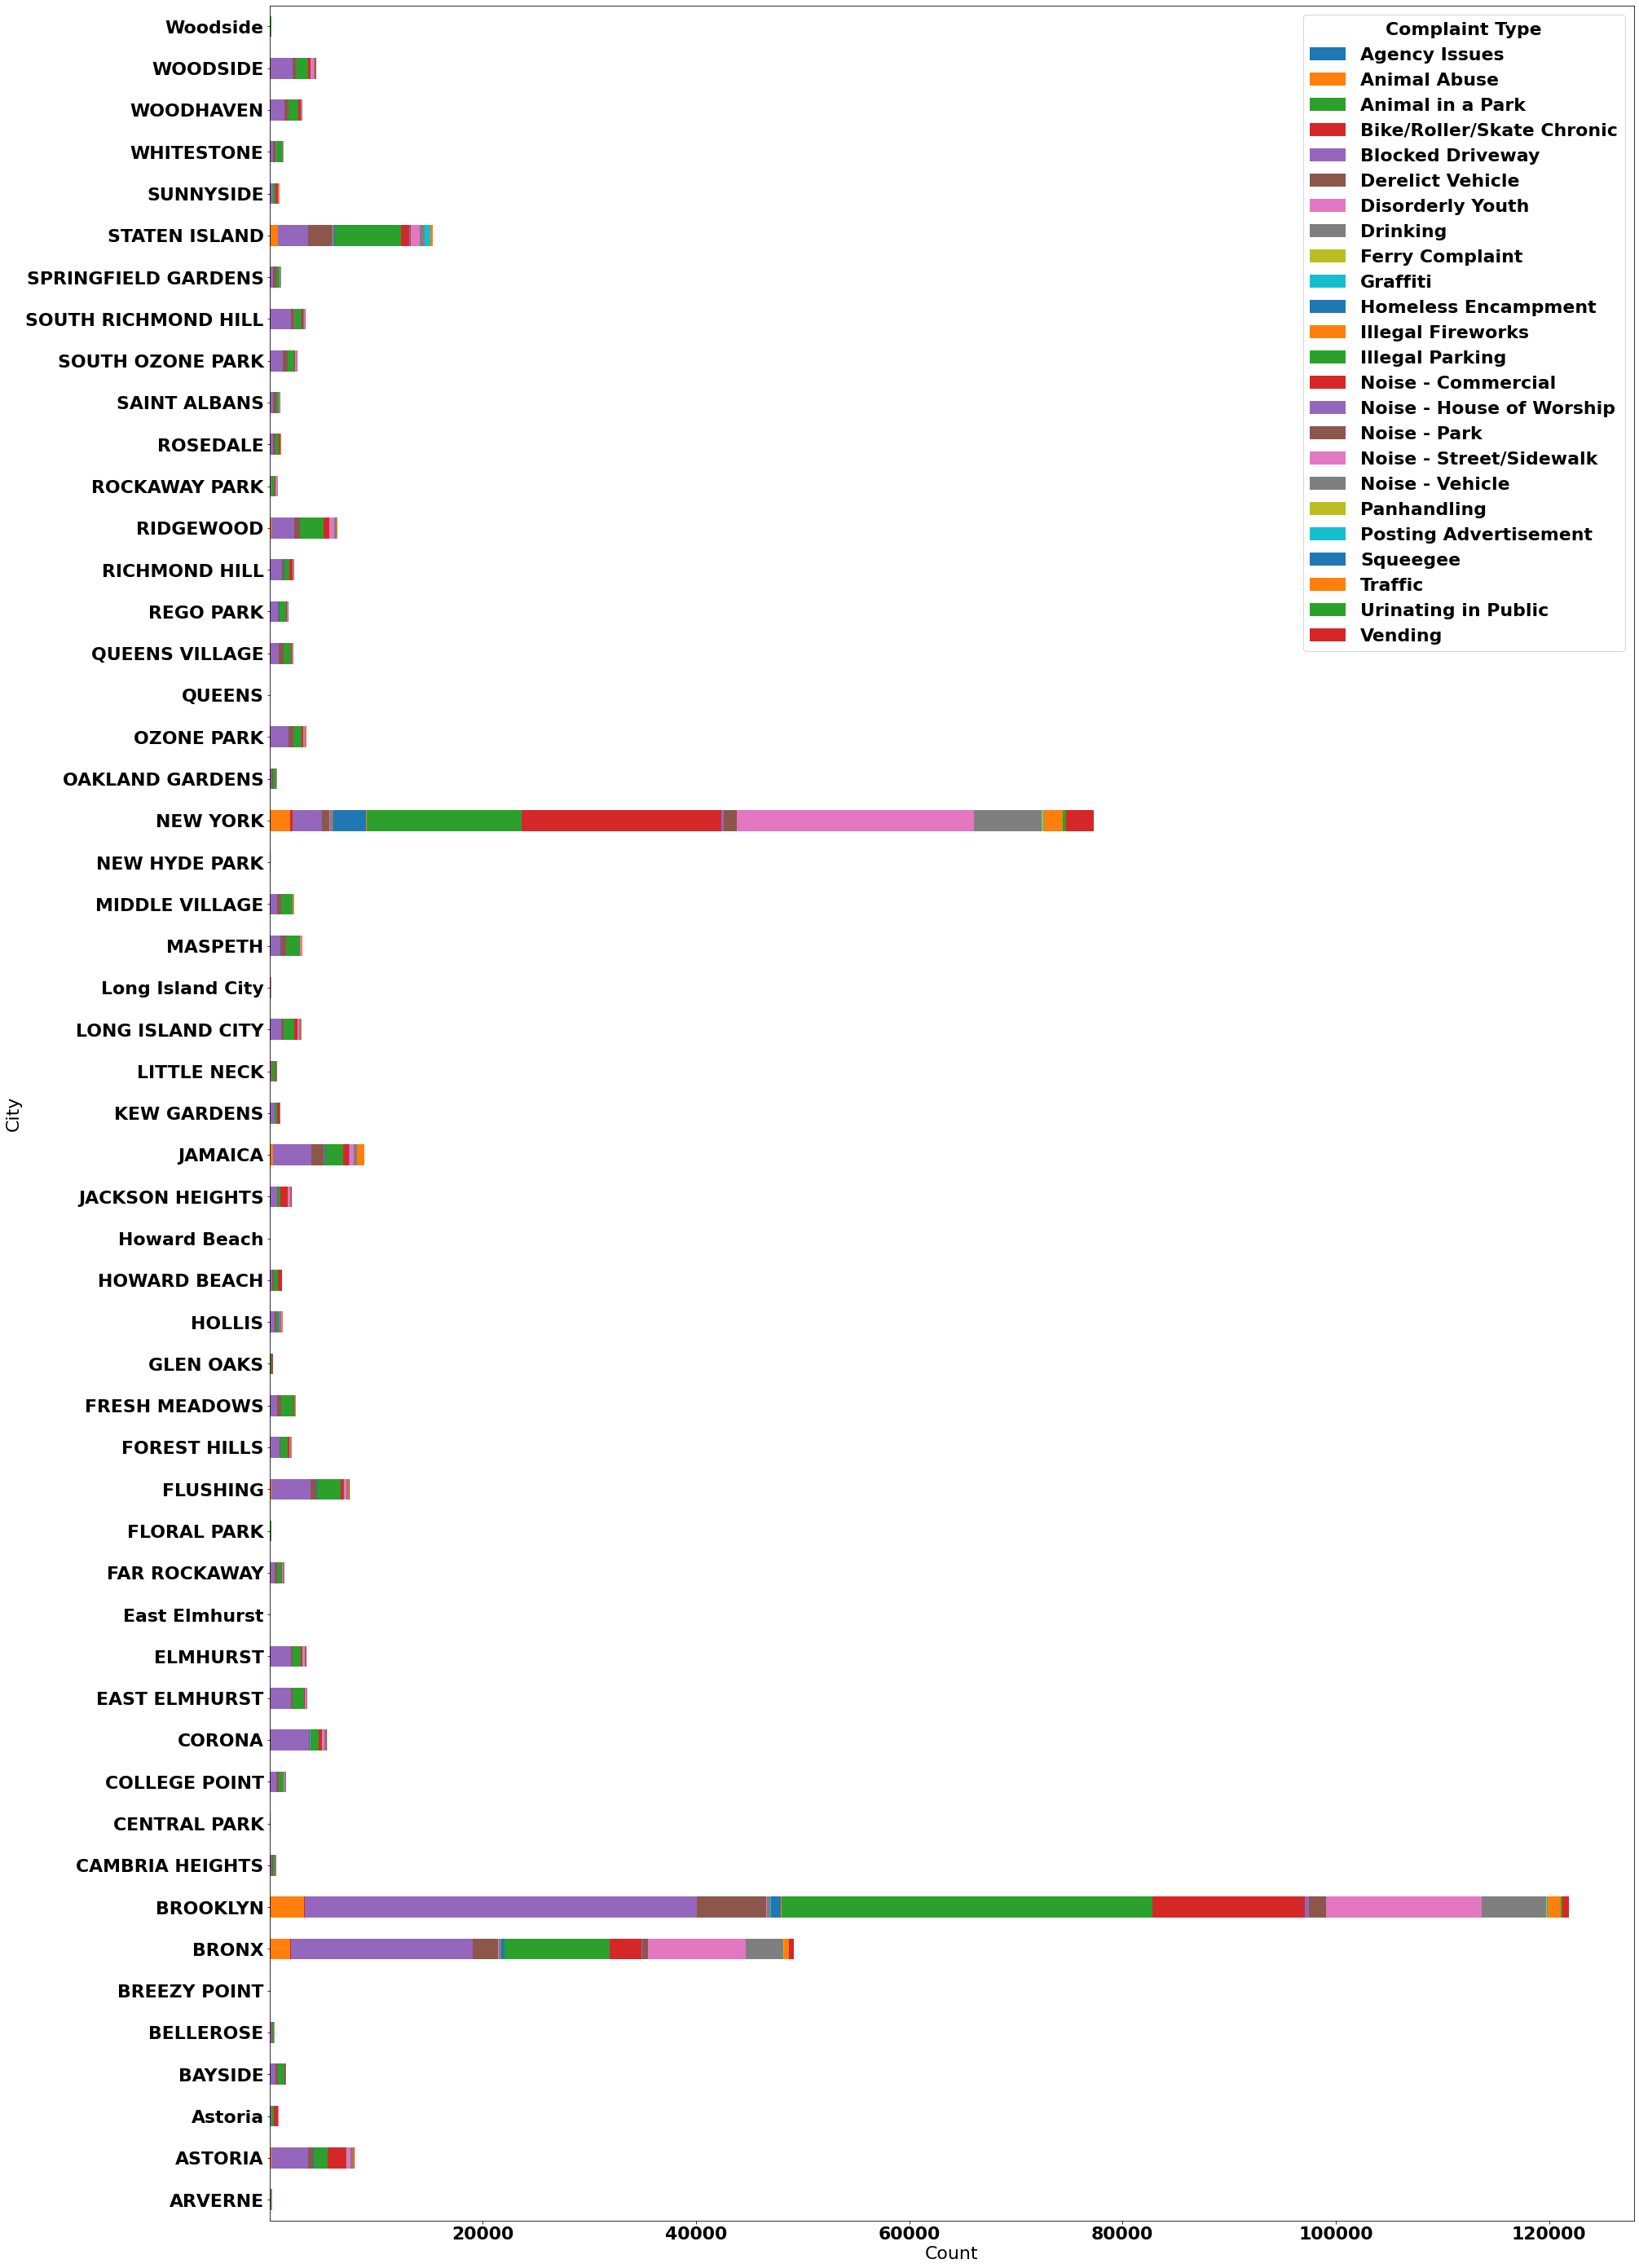

In [17]:
GB.plot(kind='barh',figsize=(30,50),stacked=True)
plt.xlabel('Count')

## Plot a bar graph of count vs. complaint types

Text(0.5, 1.0, 'Count Vs Complaint Types')

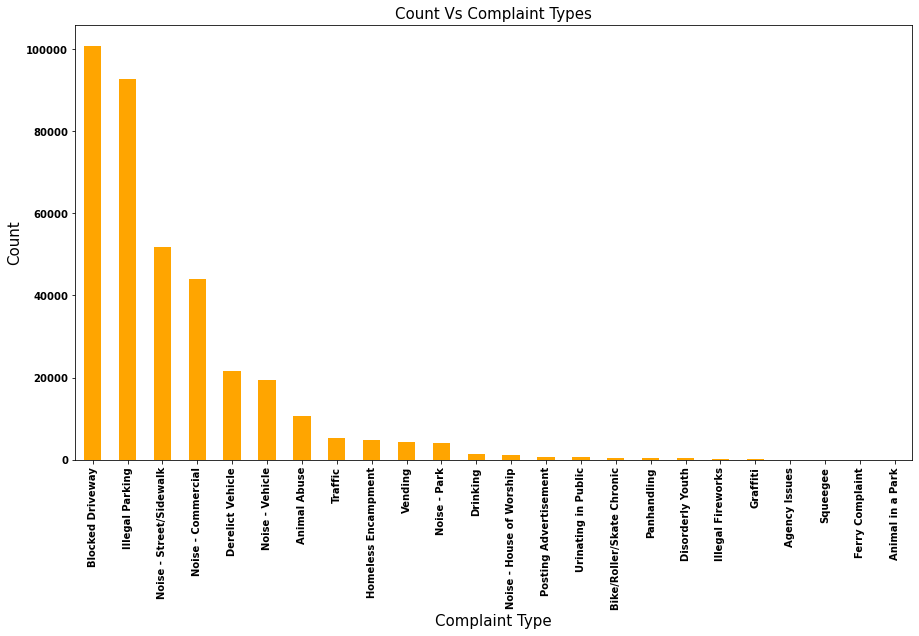

In [119]:
font = {'family' : 'sans-serif',
        'weight' : 'bold',
        'size'   : 10}
plt.rc('font', **font)
df['Complaint Type'].value_counts().plot(kind='bar',figsize=(15,8),color='orange')
plt.ylabel('Count',fontsize=15)
plt.xlabel('Complaint Type',fontsize=15)
plt.title('Count Vs Complaint Types',fontsize=15)

## Find the top 10 types of complaints

In [19]:
t[0:10]

Blocked Driveway           100881
Illegal Parking             92679
Noise - Street/Sidewalk     51692
Noise - Commercial          44109
Derelict Vehicle            21661
Noise - Vehicle             19352
Animal Abuse                10541
Traffic                      5198
Homeless Encampment          4879
Vending                      4192
Name: Complaint Type, dtype: int64

## Display the types of complaints in each city in a separate dataset

In [29]:
Req_Dataset=df.value_counts(['City','Complaint Type']).reset_index().rename({0:'Count'},axis=1)
Req_Dataset

,City,Complaint Type,Count
0,BROOKLYN,Blocked Driveway,36780
1,BROOKLYN,Illegal Parking,34800
2,NEW YORK,Noise - Street/Sidewalk,22252
3,NEW YORK,Noise - Commercial,18692
4,BRONX,Blocked Driveway,17063
...,...,...,...
774,FOREST HILLS,Noise - House of Worship,1
775,FOREST HILLS,Illegal Fireworks,1
776,FOREST HILLS,Drinking,1
777,FOREST HILLS,Disorderly Youth,1


<AxesSubplot:>

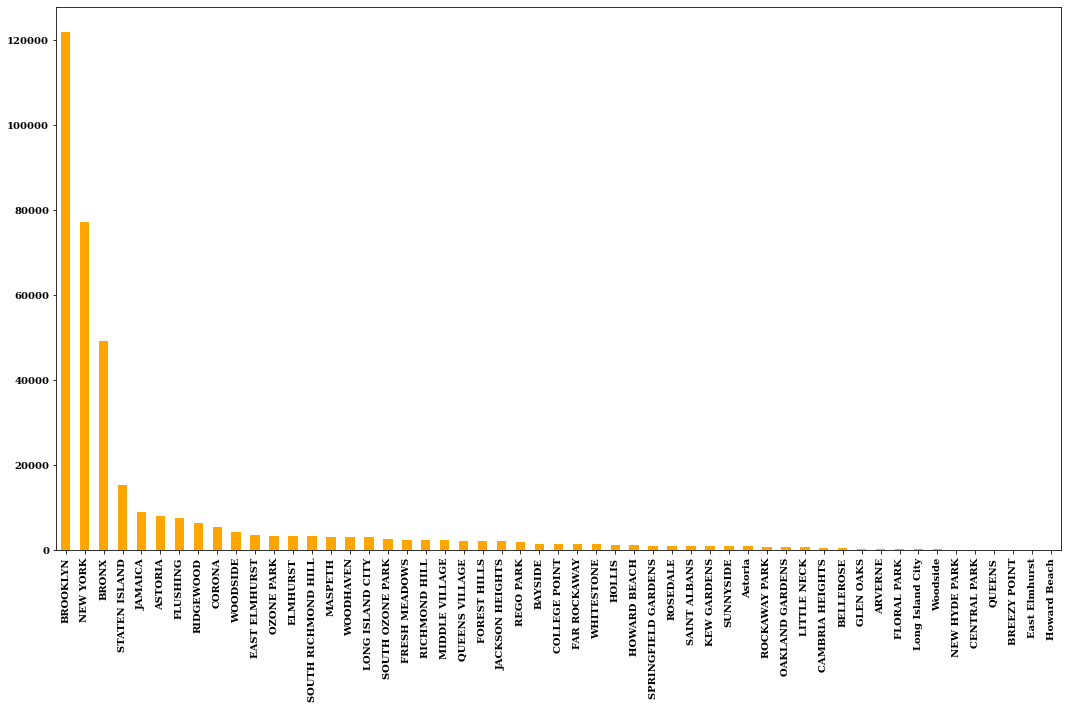

In [118]:
font = {'family' : 'serif',
        'weight' : 'bold',
        'size'   : 10}
plt.rc('font', **font)
df['City'].value_counts().plot(kind='bar',figsize=(18,10),color='orange')

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364558 entries, 0 to 364557
Data columns (total 53 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unique Key                      364558 non-null  int64  
 1   Created Date                    364558 non-null  object 
 2   Closed Date                     362177 non-null  object 
 3   Agency                          364558 non-null  object 
 4   Agency Name                     364558 non-null  object 
 5   Complaint Type                  364558 non-null  object 
 6   Descriptor                      358057 non-null  object 
 7   Location Type                   364425 non-null  object 
 8   Incident Zip                    361560 non-null  float64
 9   Incident Address                312859 non-null  object 
 10  Street Name                     312859 non-null  object 
 11  Cross Street 1                  307370 non-null  object 
 12  Cross Street 2  

In [54]:
df['Closed Date']=pd.to_datetime(df['Closed Date'])

In [55]:
df['Created Date']=pd.to_datetime(df['Created Date'])

In [56]:
df['Closed Date']

0        2016-01-01 00:55:15
1        2016-01-01 01:26:57
2        2016-01-01 04:51:03
3        2016-01-01 07:43:13
4        2016-01-01 03:24:42
                 ...        
364553   2015-01-01 10:22:31
364554   2015-01-01 02:25:02
364555   2015-01-01 00:20:33
364556   2015-01-01 02:42:22
364557   2015-01-01 02:47:50
Name: Closed Date, Length: 364558, dtype: datetime64[ns]

## Check if the average response time across various types of complaints

In [58]:
df['Response_Time']=df['Closed Date']-df['Created Date']

In [63]:
df['Response_Time'].sum()/364558

Timedelta('0 days 04:10:14.591700086')

In [64]:
GB

Complaint Type,Agency Issues,Animal Abuse,Animal in a Park,Bike/Roller/Skate Chronic,Blocked Driveway,Derelict Vehicle,Disorderly Youth,Drinking,Ferry Complaint,Graffiti,...,Noise - House of Worship,Noise - Park,Noise - Street/Sidewalk,Noise - Vehicle,Panhandling,Posting Advertisement,Squeegee,Traffic,Urinating in Public,Vending
City,,,,,,,,,,,,,,,,,,,,,
ARVERNE,0.0,46.0,0.0,0.0,50.0,32.0,2.0,1.0,0.0,1.0,...,14.0,2.0,29.0,10.0,1.0,0.0,0.0,1.0,1.0,1.0
ASTORIA,0.0,170.0,0.0,16.0,3436.0,426.0,5.0,43.0,0.0,4.0,...,21.0,64.0,409.0,236.0,2.0,3.0,0.0,60.0,10.0,57.0
Astoria,0.0,0.0,0.0,0.0,159.0,14.0,0.0,0.0,0.0,0.0,...,0.0,0.0,145.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
BAYSIDE,0.0,53.0,0.0,0.0,514.0,231.0,2.0,1.0,0.0,3.0,...,3.0,4.0,17.0,24.0,0.0,0.0,0.0,9.0,0.0,2.0
BELLEROSE,0.0,15.0,0.0,1.0,138.0,120.0,2.0,1.0,0.0,0.0,...,1.0,1.0,13.0,11.0,1.0,1.0,0.0,9.0,1.0,0.0
BREEZY POINT,0.0,2.0,0.0,0.0,3.0,3.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
BRONX,0.0,1971.0,0.0,22.0,17063.0,2403.0,66.0,206.0,0.0,15.0,...,90.0,548.0,9146.0,3556.0,20.0,18.0,0.0,427.0,54.0,433.0
BROOKLYN,8.0,3203.0,0.0,129.0,36780.0,6460.0,79.0,299.0,2.0,60.0,...,391.0,1601.0,14622.0,6024.0,52.0,59.0,0.0,1261.0,155.0,582.0
CAMBRIA HEIGHTS,0.0,15.0,0.0,0.0,177.0,148.0,0.0,0.0,0.0,0.0,...,2.0,0.0,29.0,100.0,0.0,0.0,0.0,7.0,0.0,0.0


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(

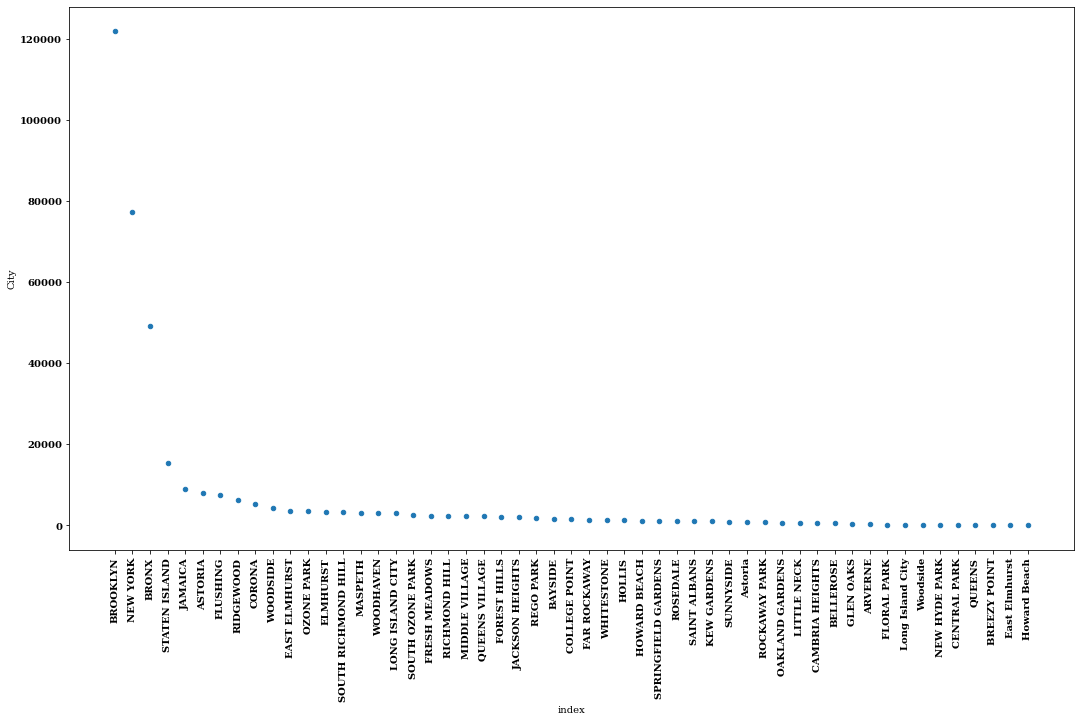

In [90]:
t.plot(kind='scatter',x='index',y='City',figsize=(18,10),stacked=True)
plt.xticks(rotation='vertical')

In [91]:
temp_df=df[df['City']=='BROOKLYN']

In [92]:
temp_df.shape

(121859, 54)

In [127]:
temp_df['City']

5         BROOKLYN
9         BROOKLYN
13        BROOKLYN
17        BROOKLYN
18        BROOKLYN
            ...   
364539    BROOKLYN
364541    BROOKLYN
364544    BROOKLYN
364545    BROOKLYN
364546    BROOKLYN
Name: City, Length: 121859, dtype: object

## Draw scatter plots for complaint concentration across Brooklyn

In [124]:
temp=temp_df['Complaint Type'].value_counts().reset_index().rename({'index':'Complaint Type','Complaint Type':'Count'},axis=1)

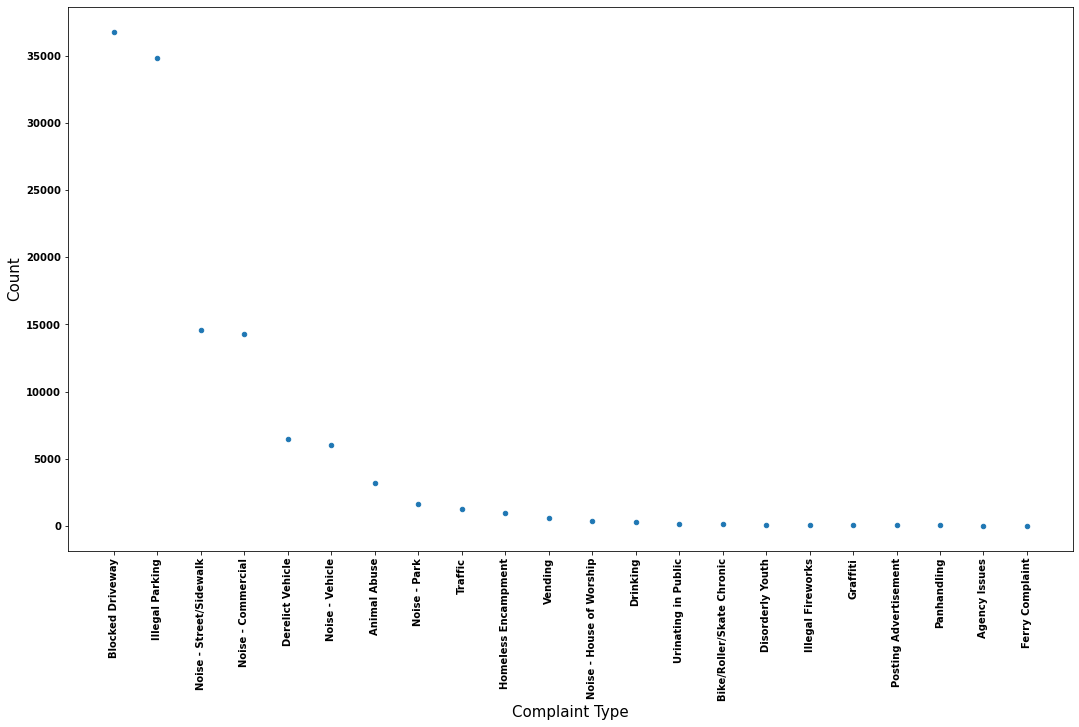

In [125]:
temp.plot(kind='scatter',x='Complaint Type',y='Count',figsize=(18,10))
plt.xticks(rotation=90)
plt.xlabel('Complaint Type',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.show()